### Central limit theorem

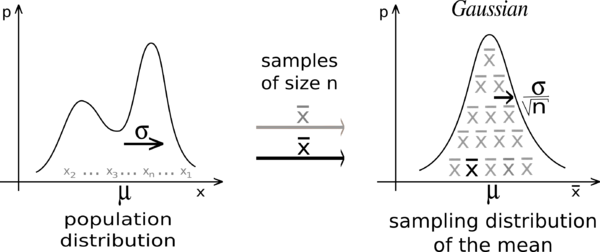

In [2]:
import scipy.stats as st
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=0.9, style="whitegrid")

In [3]:
fig = plt.figure(figsize=(16, 5))

<Figure size 1600x500 with 0 Axes>

In [4]:
means = []
conf_intervals = []

In [10]:
for _ in range(10000):
    sample = st.chi2.rvs(10, size=10000) # samples from distribution
    sample_mean, sample_std = sample.mean(), sample.std()
    conf_interval = [sample_mean - st.norm.ppf(1 - (1 - 0.95) / 2) * sample_std / np.sqrt(50), # 95% confidence interval
                    sample_mean + st.norm.ppf(1 - (1 - 0.95) / 2) * sample_std / np.sqrt(50)]
    means.append(sample_mean)
    conf_intervals.append(conf_interval)

In [4]:
def visulize_mean_dist(dist_func, args, conf=0.95, sample_size=1000):
    
    fig = plt.figure(figsize=(16, 5)) # настройка размера графика

    plt.subplot(1,3,1) # создание нескольких коорд.осей в одном окне 
    sample = dist_func.rvs(size=10000, **args) # генерация с помощью rvs 10000 случайных величин
    real_mean, real_var, _, _ = dist_func.stats(moments='mvsk', **args) # считаем и сохраняем в переменные основные статистики
    real_mean, real_std = float(real_mean), float(np.sqrt(real_var)) # пересчитываем стандартное отклонение (берем корень из сигмы)

    
    x = np.linspace(dist_func.ppf(0.00001, **args), dist_func.ppf(0.99999, **args), 100) # Генерируем перцентили
    plt.plot(x, dist_func.pdf(x, **args),'r-', lw=5, alpha=0.6, label='chi2 pdf') # density
    plt.hist(sample, density=True, alpha=0.8, bins=20);
    plt.title('input distribution', fontsize=16)

    plt.subplot(1,3,2)
    means = []
    conf_intervals = []
    for _ in range(10000):
        sample = dist_func.rvs(size=sample_size, **args) # Выборка из распределения
        sample_mean, sample_std = sample.mean(), sample.std() # Считаем среднее и стандартное отклонение по выборке
        conf_interval = [sample_mean - st.norm.ppf(1 - (1 - conf) / 2) * sample_std / np.sqrt(sample_size), # 95% confidence interval
                         sample_mean + st.norm.ppf(1 - (1 - conf) / 2) * sample_std / np.sqrt(sample_size)]
        means.append(sample_mean)
        conf_intervals.append(conf_interval)
    means = np.array(means)
    conf_intervals = np.array(conf_intervals)
    plt.hist(means, density=True, alpha=0.8, bins=24) # histogram
    plt.title('mean distribution', fontsize=16)
    
    plt.subplot(1,3,3)
    st.probplot((means - real_mean) / (real_std / np.sqrt(sample_size)), dist="norm", plot=plt) # qq-plot
    plt.title('mean qq-plot', fontsize=16)
    
    plt.show()
    
    calc_conf = np.mean(list(map(lambda x: 1 if (real_mean >= x[0]) & (real_mean <= x[1]) else 0, 
                                 conf_intervals)))
    print("calc confidence: ", calc_conf)
    
    avg_conf_interval = [np.round(conf_intervals.mean(axis=0)[0], 4),
                         np.round(conf_intervals.mean(axis=0)[1], 4)]
    print("average confidence interval for mean: ", avg_conf_interval)
    
    return conf_intervals, real_mean, calc_conf, avg_conf_interval#, test_results #(means, real_mean, real_std)

https://docs.scipy.org/doc/scipy/reference/stats.html

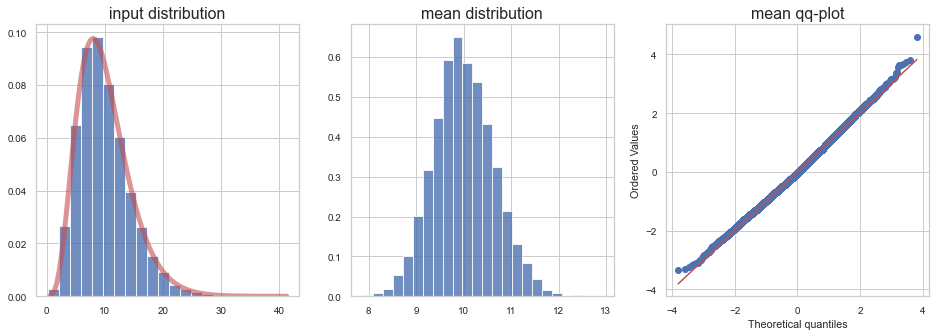

calc confidence:  0.9846
average confidence interval for mean:  [8.4016, 11.6043]
CPU times: user 3.52 s, sys: 95.6 ms, total: 3.61 s
Wall time: 3.41 s


In [5]:
%%time
conf_intervals, real_mean, calc_conf, avg_conf_interval = visulize_mean_dist(
    st.chi2, {'df': 10}, 
    conf=0.99, 
    sample_size=50)

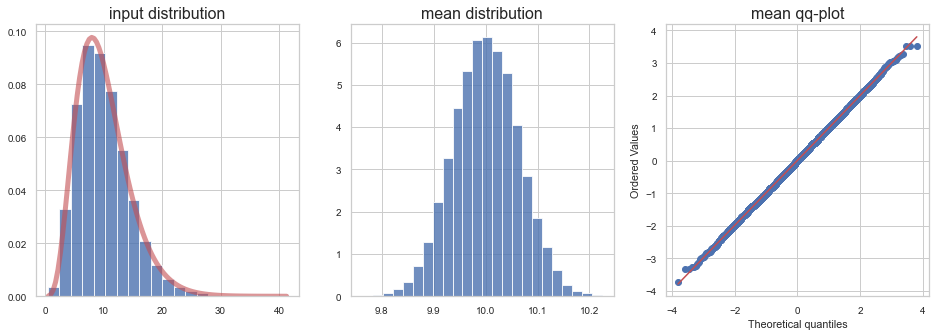

calc confidence:  0.9898
average confidence interval for mean:  [9.8377, 10.1635]


In [6]:
conf_intervals, real_mean, calc_conf, avg_conf_interval = visulize_mean_dist(
    st.chi2, {'df': 10}, 
    conf=0.99, 
    sample_size=5000)

In [ ]:
import numpy as np
from scipy.stats import alpha